# EDA

### Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Configurações de visualização


In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

##### Carregando o arquivo parquet


In [3]:
file_path = '17_09_24_openaq_data.parquet'
df = pd.read_parquet(file_path)

##### Visualizando os registros do topo

In [4]:
df.head()


,location,city,country,latitude,longitude,pm25 (µg/m³),pm25_lastUpdated,pm10 (µg/m³),pm10_lastUpdated,pm1 (µg/m³),...,o3 (ppm),so2 (ppm),no2 (ppm),co (ppm),no (ppm),no_lastUpdated,nox (ppm),nox_lastUpdated,bc (µg/m³),bc_lastUpdated
0,Siavonga,None,ZM,-16.541315,28.707835,59.741667,2024-09-17T05:00:00+00:00,70.262499,2024-09-17T05:00:00+00:00,39.225000,...,NaN,NaN,NaN,NaN,NaN,None,NaN,None,NaN,None
1,Siavonga Harbour 2,None,ZM,-16.541213,28.708111,46.933334,2024-09-17T05:00:00+00:00,56.854166,2024-09-17T05:00:00+00:00,30.845834,...,NaN,NaN,NaN,NaN,NaN,None,NaN,None,NaN,None
2,"CAP / UPS, KZN, ZA.",None,ZA,-29.474064,31.217176,7.583036,2024-09-17T05:00:00+00:00,7.916518,2024-09-17T05:00:00+00:00,4.319643,...,NaN,NaN,NaN,NaN,NaN,None,NaN,None,NaN,None
3,PTA-NORTH,None,ZA,-25.681506,28.156085,47.141667,2024-09-17T05:00:00+00:00,58.783333,2024-09-17T05:00:00+00:00,27.145833,...,NaN,NaN,NaN,NaN,NaN,None,NaN,None,NaN,None
4,"CAP / MOR1, KZN, ZA",None,ZA,-29.835083,31.007639,22.915178,2024-09-17T05:00:00+00:00,7.207540,2024-03-09T19:00:00+00:00,4.688889,...,NaN,NaN,NaN,NaN,NaN,None,NaN,None,NaN,None


##### Verificando os tipos de dados e colunas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2367 entries, 0 to 2366
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   location                      2361 non-null   object 
 1   city                          1737 non-null   object 
 2   country                       2367 non-null   object 
 3   latitude                      2367 non-null   float64
 4   longitude                     2367 non-null   float64
 5   pm25 (µg/m³)                  1726 non-null   float64
 6   pm25_lastUpdated              1726 non-null   object 
 7   pm10 (µg/m³)                  805 non-null    float64
 8   pm10_lastUpdated              805 non-null    object 
 9   pm1 (µg/m³)                   314 non-null    float64
 10  pm1_lastUpdated               314 non-null    object 
 11  um003 (particles/cm³)         273 non-null    float64
 12  um003_lastUpdated             273 non-null    object 
 13  rel

#### Identificando os valores ausentes

In [ ]:
missing_values = df.isna().sum()
print("Valores ausentes por coluna:\n", missing_values)

#### Removendo colunas formadas por strings

In [11]:
# Selecionando colunas que NÃO são do tipo 'object' (strings)
df_numerical = df.select_dtypes(exclude=['object'])
df = df_numerical

#### Estatísticas descritivas

In [12]:
df.describe()


,latitude,longitude,pm25 (µg/m³),pm10 (µg/m³),pm1 (µg/m³),um003 (particles/cm³),relativehumidity (%),temperature (c),temperature (f),co (µg/m³),no2 (µg/m³),so2 (µg/m³),o3 (µg/m³),o3 (ppm),so2 (ppm),no2 (ppm),co (ppm),no (ppm),nox (ppm),bc (µg/m³)
count,2367.000000,2367.000000,1726.000000,805.000000,314.000000,273.000000,302.000000,326.000000,39.000000,11.000000,11.000000,3.000000,3.000000,1148.000000,294.000000,341.000000,242.000000,179.000000,161.000000,20.000000
mean,37.180711,-89.964317,9.430746,17.641395,5.121557,1128.792450,56.292818,20.109685,21.111282,609.309394,19.391222,38.331099,-42.303333,0.028026,0.000719,0.005970,0.244174,0.001920,0.008343,0.550500
std,8.699714,47.968616,66.106771,30.083555,8.937192,1200.475583,13.898624,3.954547,3.449324,496.704874,13.832209,62.884135,154.757502,0.014148,0.001387,0.007307,0.305090,0.005905,0.012026,0.796125
min,-33.834119,-157.871100,-999.000000,-2.000000,0.000000,3.000000,16.658333,5.559141,15.240000,0.000000,2.252867,0.133298,-220.920000,0.000000,-0.001000,-0.000200,0.000000,-0.002200,0.000000,0.000000
25%,34.029945,-118.073142,3.900000,6.752827,1.781176,611.455353,47.607217,17.861667,18.440000,343.100000,11.415286,2.041649,-89.300000,0.020000,0.000100,0.002000,0.130000,0.000000,0.001600,0.147500
50%,38.462120,-95.386824,5.868333,13.000000,3.449405,874.026784,56.379167,19.652917,20.790000,483.500000,15.900000,3.950000,42.320000,0.027000,0.000400,0.003900,0.200000,0.000100,0.004500,0.300000
75%,41.729304,-82.339330,8.300000,21.000000,5.749244,1299.247030,64.932924,21.967500,23.250000,697.550000,22.900000,57.430000,47.005000,0.036000,0.001000,0.006600,0.300000,0.000400,0.007800,0.532500
max,64.845931,121.792928,1126.640000,564.000000,135.826529,12066.819987,99.000000,42.045376,29.250000,1881.700000,49.920000,110.910000,51.690000,0.140000,0.016000,0.055400,4.400000,0.043500,0.070900,3.110000


#### Correlação entre dados

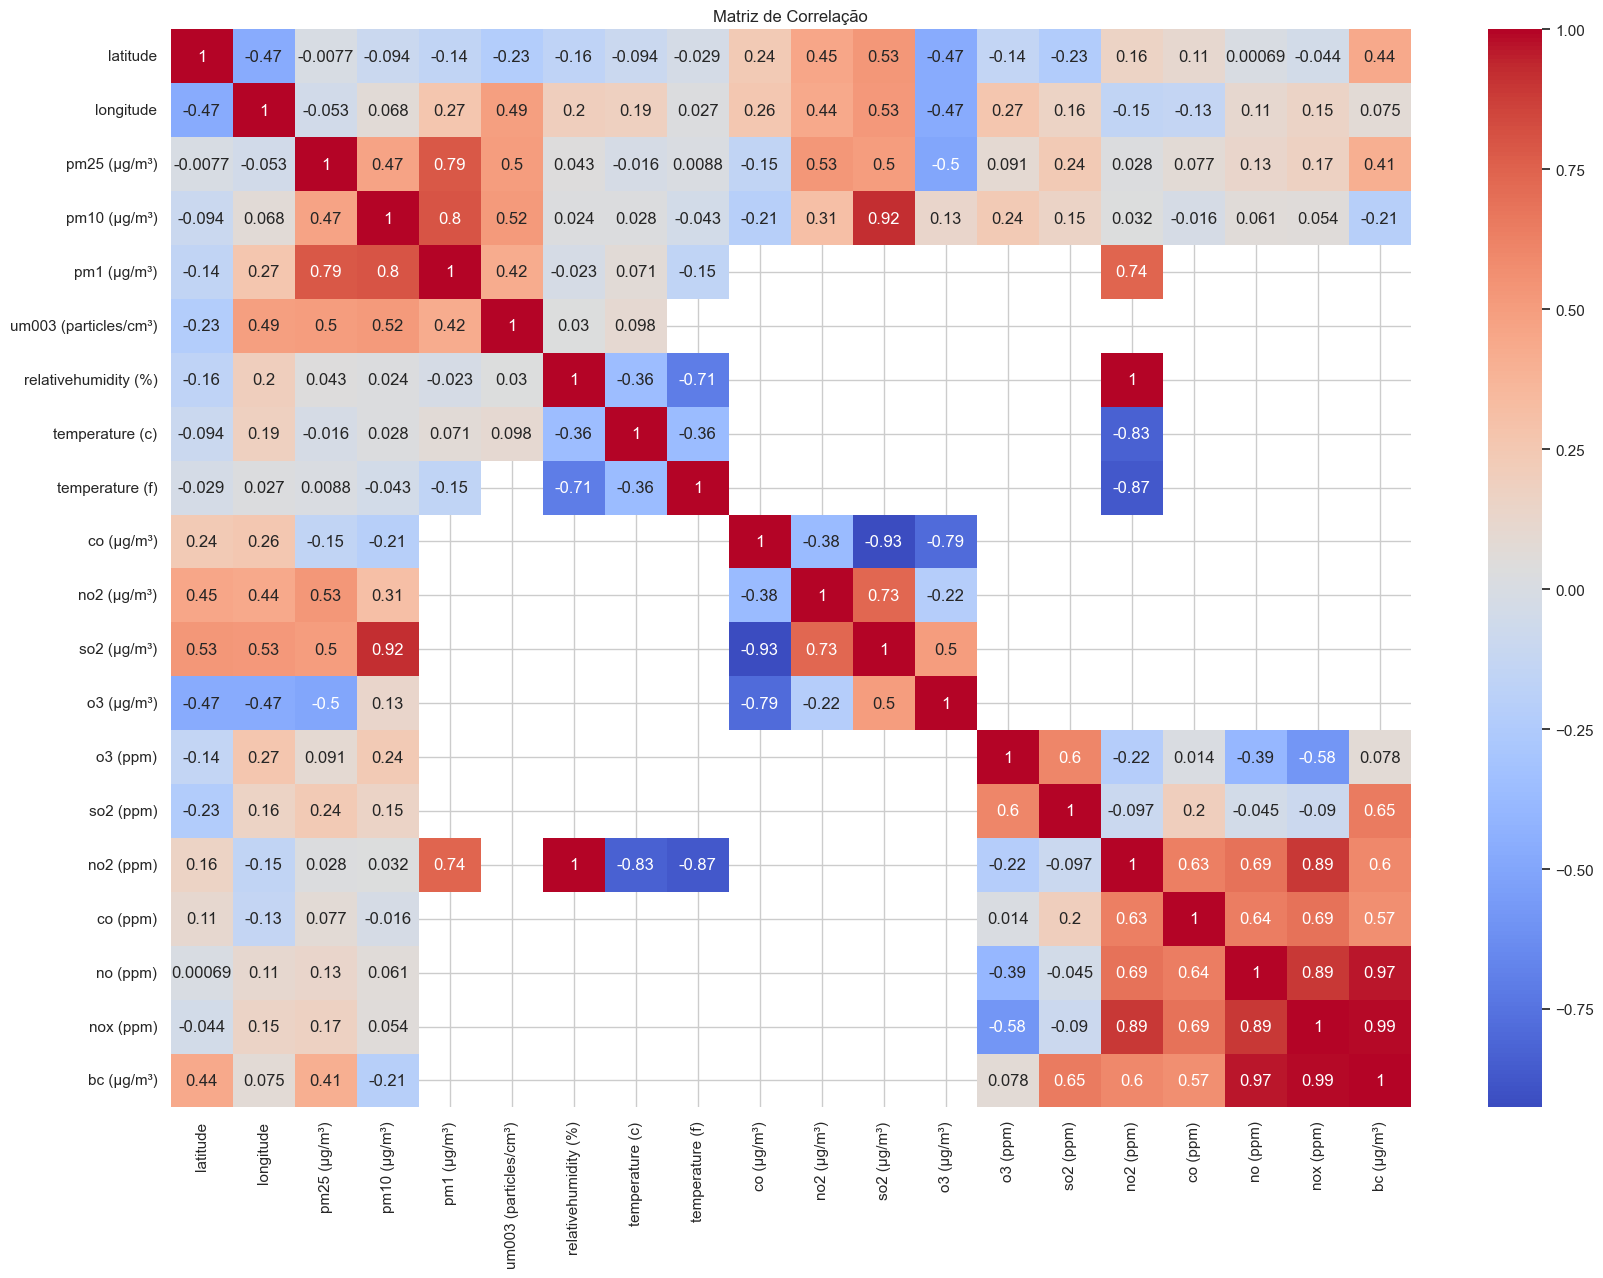

In [15]:
# Verificando correlação entre variáveis numéricas
correlation_matrix = df.corr()

plt.figure(figsize=(20, 14))  # Aumenta o tamanho do mapa de calor

# Mapa de calor de correlações
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title("Matriz de Correlação")
plt.show()